## SSAC - Exploration2 - Machine Learning Practice with Scikit - learn Package

In [1]:
# import requried packages
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing 
from sklearn.tree import DecisionTreeClassifier # decision tree model
from sklearn.ensemble import RandomForestClassifier # random forest model
from sklearn import svm # support vector machine model
from sklearn.linear_model import SGDClassifier # stochastic gradient descent model
from sklearn.linear_model import LogisticRegression # logistic regression model

## 1. evaluate models trained with 'load_digits' data set

### 1) import required module

In [2]:
from sklearn.datasets import load_digits

### 2) load data

In [3]:
digits = load_digits()

### 3) look into loaded dataset

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
# dataset description
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [6]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [7]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [8]:
print(digits.data.shape)
print(digits.images.shape)

(1797, 64)
(1797, 8, 8)


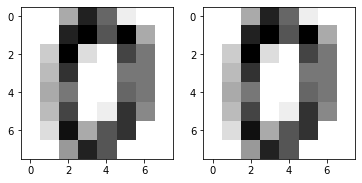

In [9]:
fig = plt.figure()
fig.add_subplot(1,2, 1)
plt.imshow(digits.data[0].reshape(8,8), cmap=plt.cm.binary)
fig.add_subplot(1,2, 2)
plt.imshow(digits.images[0], cmap=plt.cm.binary)
plt.show()

+ `digits.data` and `digits.images` have the exact same data but in different shape

In [10]:
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

+ each value is designated to each pixel in 8x8 size image. I am not sure to which axis two numbers are assigned though. maybe vetical then horizontal?

In [11]:
print(digits.frame)

None


+ why None type object takes up frame module?

In [12]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [13]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#### 3)-3 print target names

In [14]:
print(len(digits.target))
print(len(digits.target_names))
print(pd.unique(digits.target))
print(digits.target_names)

1797
10
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [15]:
pd.value_counts(digits.target)

3    183
5    182
1    182
6    181
4    181
9    180
7    179
0    178
2    177
8    174
dtype: int64

 + 1797 images are more or less evenly distributed among 10 classes.

#### 3)-1, 4) assign feature and label data, and split test and train data

In [16]:
# use digits.data and digits.target to make feature data and label data and split train, test data
X_train, X_test, y_train, y_test = train_test_split(digits.data, 
                                                    digits.target, 
                                                    test_size=0.2, 
                                                    random_state=7)

In [17]:
# logistic regression model in sklearn requires either increasing max_iteration argument or scaling dataset
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler()

#### 5) train various models

In [18]:
# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=7)
decision_tree.fit(scaler.transform(X_train), y_train)
y_pred = decision_tree.predict(scaler.transform(X_test))

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.75      0.79      0.77        42
           2       0.77      0.82      0.80        40
           3       0.88      0.88      0.88        34
           4       0.81      0.92      0.86        37
           5       0.87      0.96      0.92        28
           6       0.90      0.93      0.91        28
           7       0.90      0.82      0.86        33
           8       0.90      0.63      0.74        43
           9       0.72      0.81      0.76        32

    accuracy                           0.84       360
   macro avg       0.85      0.85      0.85       360
weighted avg       0.85      0.84      0.84       360



In [19]:
# Random Forest
random_forest = RandomForestClassifier(random_state=7)
random_forest.fit(scaler.transform(X_train), y_train)
y_pred = random_forest.predict(scaler.transform(X_test))

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        40
           3       0.89      0.97      0.93        34
           4       0.90      0.97      0.94        37
           5       0.90      0.96      0.93        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       1.00      0.81      0.90        43
           9       0.93      0.88      0.90        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



In [20]:
# Support Vector Machine
svm_model = svm.SVC(random_state=7)
svm_model.fit(scaler.transform(X_train), y_train)
y_pred = svm_model.predict(scaler.transform(X_test))

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.98      1.00      0.99        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.97      1.00      0.98        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.98      0.99        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [21]:
# Stochastic Gradient Descent
sgd_model = SGDClassifier(random_state=7)
sgd_model.fit(scaler.transform(X_train), y_train)
y_pred = sgd_model.predict(scaler.transform(X_test))

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.86      0.90        42
           2       0.97      0.95      0.96        40
           3       0.86      0.91      0.89        34
           4       1.00      0.95      0.97        37
           5       0.93      1.00      0.97        28
           6       0.96      0.96      0.96        28
           7       0.97      0.97      0.97        33
           8       0.85      0.95      0.90        43
           9       0.90      0.84      0.87        32

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



In [22]:
# Logistic Regression
logistic_regression = LogisticRegression(random_state=7)
logistic_regression.fit(scaler.transform(X_train), y_train)
y_pred = logistic_regression.predict(scaler.transform(X_test))

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.93      0.93      0.93        42
           2       0.98      1.00      0.99        40
           3       0.97      1.00      0.99        34
           4       1.00      0.97      0.99        37
           5       0.88      1.00      0.93        28
           6       1.00      0.93      0.96        28
           7       1.00      1.00      1.00        33
           8       0.95      0.88      0.92        43
           9       0.91      0.91      0.91        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



#### 5) evaluate trained model

+ evaluation metric : Accuracy
  + Accuracy seems appropriate to evaluate models trained with digits dataset.
  + There are ten target categories. ; It makes hard to examine every precision, sensitivity or f1-score for each category in every trained model.
  + Data is evenly distributed among classes. : each class has 174 to 183 records.   
      + Sensitivity or precison of each class are less likely distort accuracy score in whole dataset.
  + Difference between precision and recall does not have significant meaning in this context.
      + We simply ask if the trained model classifies the images correctly. Both classifying 0 to 1 and 1 to 0 are simply wrong.; Neither gives us significant impact.

+ best model : Support Vector Machine
    + support vector machine shows best accuracy score with 0.99.

---

## 2. evaluate models trained with 'load_wine' dataset

### 1) import required module

In [23]:
from sklearn.datasets import load_wine

### 2) load data

In [24]:
wine = load_wine()

### 3) look into loaded dataset

In [25]:
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

#### 3)-1 assign feature data

In [26]:
wine_data = wine.data
wine_data.shape

(178, 13)

#### 3)-2 assign label data 

In [27]:
wine_label = wine.target

#### 3)-3 print target name

In [28]:
print(len(wine_label))
print(len(wine.target_names))
print(pd.unique(wine_label))
print(wine.target_names)

178
3
[0 1 2]
['class_0' 'class_1' 'class_2']


+ 0, 1 and 2 mean class0, class1 and class2 respectively.

#### 3)-4 data description

In [29]:
pd.value_counts(wine_label)

1    71
0    59
2    48
dtype: int64

In [30]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [31]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

+ At summary statistics section of above description, you can learn features in the dataset are in different scale.
+ It is hard to say the records are evenly distributed as class_1 has 71 records, more than 150 percent of class_2.

#### 4) split train and test dataset

In [32]:
X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

In [33]:
# scailing dataset
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler()

#### 5) train various model

In [34]:
# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=7)
decision_tree.fit(scaler.transform(X_train), y_train)
y_pred = decision_tree.predict(scaler.transform(X_test))

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.89      0.94      0.91        17
           2       1.00      0.83      0.91        12

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



In [35]:
# Random Forest
random_forest = RandomForestClassifier(random_state=7)
random_forest.fit(scaler.transform(X_train), y_train)
y_pred = random_forest.predict(scaler.transform(X_test))

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [36]:
# Support Vector Machine
svm_model = svm.SVC(random_state=7)
svm_model.fit(scaler.transform(X_train), y_train)
y_pred = svm_model.predict(scaler.transform(X_test))

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [37]:
# Stochastic Gradient Descent
sgd_model = SGDClassifier(random_state=7)
sgd_model.fit(scaler.transform(X_train), y_train)
y_pred = sgd_model.predict(scaler.transform(X_test))

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.94      0.94      0.94        17
           2       0.92      0.92      0.92        12

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.94      0.94      0.94        36



In [38]:
# Logistic Regression
logistic_regression = LogisticRegression(random_state=7)
logistic_regression.fit(scaler.transform(X_train), y_train)
y_pred = logistic_regression.predict(scaler.transform(X_test))

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.94      1.00      0.97        17
           2       1.00      0.92      0.96        12

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36



#### 5) evaluate trained model

+ evaluation metric : Precision
  + Precision seems appropriate to evaluate models trained with wine dataset.
  + There are three target categories. ; It makes rather easy to examine precision, sensitivity or f1-score for each category in the trained models.
  + It is not safe to say data is evenly distributed among classes.   
      + Accuracy may fail to reflect models's correctness across the categories.
  + Precision might have contextual significance under certain circumstances.
      + If wines in certain category cost a lot more than the others, and if you are to buy wines only by predictions of a trained model, being more accurate in certain category can make difference in terms of profit. ; more profit means better model right? 
         + Data description says all of the wine comes from same region of Italy but from different cultivators. some might say wine from same region stays in similar cost range but sometimes winery would make difference in price.
      + Precision is important in customer's perspective as well if the customers buy wines based on classification of above models.
         + If I am to buy a wine in certain category depending on predictions of a model, I would rather be having less choice than misguided. ; precison over sensitivity.

+ best model : Support Vector Machine, Random Forest
    + support vector machine and random forest show best precission score of 1 in every category.

## 3. evaluate models trained with 'load_breast_cancer' data set

### 1) import required module

In [39]:
from sklearn.datasets import load_breast_cancer

### 2) load data

In [40]:
breast_cancer = load_breast_cancer()

### 3) look into loaded dataset

In [41]:
dir(breast_cancer)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

#### 3)-1 assign feature data

In [42]:
bcancer_data = breast_cancer.data
bcancer_data.shape

(569, 30)

#### 3)-2 assign label data 

In [43]:
bcancer_label = breast_cancer.target

#### 3)-3 print target name

In [44]:
print(len(bcancer_label))
print(len(breast_cancer.target_names))
print(pd.unique(bcancer_label))
print(breast_cancer.target_names)

569
2
[0 1]
['malignant' 'benign']


#### 3)-4 data description

In [45]:
pd.value_counts(bcancer_label)

1    357
0    212
dtype: int64

In [46]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [47]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

+ 0 means malign tumor and 1 means benign tumor
   + 212 distressing results and 357 relieving results
       + not evenly distributed
       + more relieving results is good

#### 4) split train and test dataset

In [48]:
X_train, X_test, y_train, y_test = train_test_split(bcancer_data, 
                                                    bcancer_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

In [49]:
# scailing dataset
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler()

#### 5) train various model

In [50]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=7)
decision_tree.fit(scaler.transform(X_train), y_train)
y_pred = decision_tree.predict(scaler.transform(X_test))

print(classification_report(y_test, y_pred))    

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



In [51]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=7)
random_forest.fit(scaler.transform(X_train), y_train)
y_pred = random_forest.predict(scaler.transform(X_test))

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        40
           1       0.96      1.00      0.98        74

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [52]:
# Support Vector Machine
from sklearn import svm

svm_model = svm.SVC(random_state=7)
svm_model.fit(scaler.transform(X_train), y_train)
y_pred = svm_model.predict(scaler.transform(X_test))

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        40
           1       0.97      1.00      0.99        74

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



In [53]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier(random_state=7)
sgd_model.fit(scaler.transform(X_train), y_train)
y_pred = sgd_model.predict(scaler.transform(X_test))

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.99      0.99      0.99        74

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [54]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(random_state=7)
logistic_regression.fit(scaler.transform(X_train), y_train)
y_pred = logistic_regression.predict(scaler.transform(X_test))

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        40
           1       0.97      1.00      0.99        74

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



#### 5) evaluate trained model

+ evaluation metric : sensitivity or recall
  + There are mere two target categories. ; It makes rather easy to examine precision, sensitivity or f1-score for each category in the trained models.
  + It is hard to say data is evenly distributed among classes.; 212 and 357
  + When it comes to health ignorance is not a bliss; more cautious is always better.
      + being less blind to cancer is much more important than rasing less false alarm.; sensitivity over precision
      + For the sake of health high recall in malign category(0) is critical.

+ best model : Stochastic Gradient Descent
    + SGD model shows best recall score of 0.97 in 0 category.